In [36]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

In [37]:
# iris = load_iris()
# x = iris.data
# y = iris.target 
# tsne = TSNE(n_components=2, verbose=1, random_state=123)
# z = tsne.fit_transform(x)

In [38]:
# df = pd.DataFrame()
# df["y"] = y
# df["comp-1"] = z[:,0]
# df["comp-2"] = z[:,1]
# sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
#                 palette=sns.color_palette("hls", 3),
#                 data=df).set(title="Iris data T-SNE projection") 

In [48]:
import torch
embeds_adv = torch.load("test_embeds/embeds_adv_epsilon_0.0314_alpha_0.00314_min_val_0.0_max_val_1.0_max_iters_20_type_linf_randomstart_True_dct_True_ckpt.t7linear_eval_adv_dct_rocl_263epochs_b512_l256_Evaluate_linear_eval_ResNet18_cifar-10_0.pt")
embeds_ori = torch.load("test_embeds/embeds_ori_epsilon_0.0314_alpha_0.00314_min_val_0.0_max_val_1.0_max_iters_20_type_linf_randomstart_True_dct_True_ckpt.t7linear_eval_adv_dct_rocl_263epochs_b512_l256_Evaluate_linear_eval_ResNet18_cifar-10_0.pt")
embeds = torch.cat((embeds_ori, embeds_adv))
embeds.shape

torch.Size([20000, 512])

In [49]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(embeds.detach().cpu().numpy())

/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/envs/project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.008s...
[t-SNE] Computed neighbors for 20000 samples in 14.387s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

In [50]:
import numpy as np
n = 8000
z_ = np.concatenate((z[:n], z[10000:10000+n]))
z_.shape

(16000, 2)

/tmp/ipykernel_24355/570423276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"][n:] = "Adversarial"
/tmp/ipykernel_24355/570423276.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


(20.0, 25.0)

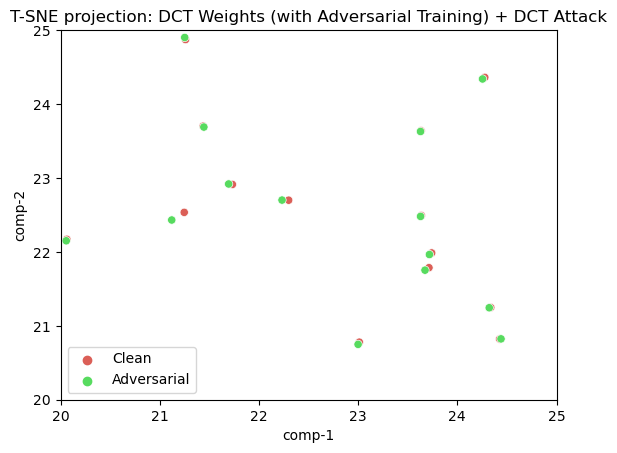

In [52]:
import matplotlib.pyplot as plt
df = pd.DataFrame()
df["comp-1"] = z_[:,0]
df["comp-2"] = z_[:,1]
df["y"] = "Clean"
df["y"][n:] = "Adversarial"
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="T-SNE projection: DCT Weights (with Adversarial Training) + DCT Attack") 
plt.ylim(20, 25)
plt.xlim(20, 25)

In [19]:
z_

array([[-16.533463  ,   3.5684514 ],
       [ 17.979359  , -16.285707  ],
       [ 20.181053  ,   6.461428  ],
       ...,
       [ 63.40306   , -25.07872   ],
       [ 27.82289   , -52.208324  ],
       [-63.641983  ,  -0.70511293]], dtype=float32)